In [1]:
# istatistiksel grafik gösterimi sağlar.
import seaborn as sns

In [2]:
#txt. uzantılı veri setini yüklemek için kullanılır.
iris = sns.load_dataset("iris")

In [3]:
#Veri setine ait ilk beş veriyi listeler. 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Veri setinin satır ve sütun sayılarını verir. İlki örneklem, ikicisi nitelik sayısıdır. 
iris.shape

(150, 5)

In [5]:
#Belirtilen veriyi kesip atar. Veri sütun olduğundan axis = 1 yazılır.
X_iris = iris.drop("species", axis = 1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris["species"]
y_iris.shape

(150,)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Rastgele üretilecek olan veriyi sabitler.
rng = np.random.RandomState(42)

In [9]:
#Belirtilen adet kadar, rastgele değer üretir. 
x = 10*rng.rand(50)
y = 2*x-1+rng.rand(50)

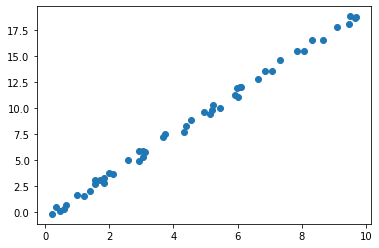

In [10]:
#İki değişkenin kesişerek oluşturduğu ilişkinin saçılım grafiğini çizer. Bu ilişkiye göre model seçilir.
plt.scatter(x,y)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression(fit_intercept = True)

In [13]:
x.shape

(50,)

In [14]:
#Mevcut verinin boyutunu, bir boyut arttırır. 
X = x[:,np.newaxis]
X.shape

(50, 1)

In [15]:
#Eğitim verileri ile modeli kurar.
model.fit(X,y)

LinearRegression()

In [16]:
#Belirtilen aralıkta bulunan değerleri istenilen sayıda parçalar. 
x_fit = np.linspace(-1,11,50)
X_fit = x_fit[:,np.newaxis]
y_fit = model.predict(X_fit)

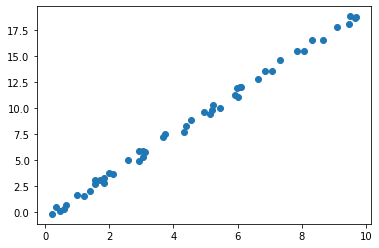

In [17]:
plt.scatter(x,y)

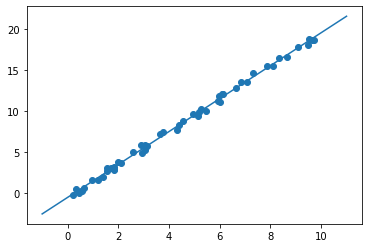

In [18]:
plt.scatter(x,y)
#Doğru çizer
plt.plot(x_fit,y_fit)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
#Bayes Teoremi ile olasılık hesaplaması yapar ve bunları sınıflandırır. 
model = GaussianNB()

In [23]:
model.fit(X_egitim, y_egitim)

GaussianNB()

In [24]:
y_model = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_model)

0.9736842105263158

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
from sklearn.decomposition import PCA

In [29]:
#Sınıflandırma ve görüntü sıkıştırma alanlarında kullanılır. Yüksek boyutlu verilerde en yüksek varyans ile veri setini tutar ve aynı anda boyutunu indirger. Küçük boyutlu verilerde daha rahat görselleştirilir. 
model = PCA(n_components = 2)

In [30]:
model.fit(X_iris)

PCA(n_components=2)

In [31]:
# Dönüşüm işlemini gerçekleştirir. Veri seti .fit() edilmeden uygulanamaz. Çünkü dönüşüm yapılırken kullanılacak parametreler hesaplanmamıştır.
X_2D = model.transform(X_iris)

In [32]:
iris["PCA1"] = X_2D[:,0]
iris["PCA2"] = X_2D[:,1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


In [33]:
import seaborn as sns

C:\Programing\anaconda3\envs\my_example\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


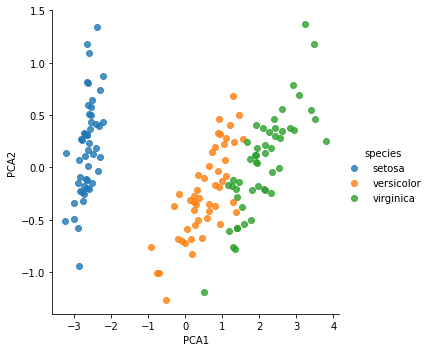

In [34]:
#Veriler arası doğrusal ilişkiyi görselleştirir.
sns.lmplot("PCA1","PCA2", hue="species", data=iris, fit_reg= False)

In [35]:
from sklearn.mixture import GaussianMixture

In [36]:
#Gauss dağılımını baz alan denetimsiz kümeleme algoritmasıdır. Olasılık temellidir.
model = GaussianMixture(n_components=3, covariance_type="full")

In [37]:
model.fit(X_iris)

GaussianMixture(n_components=3)

In [38]:
y_gmm = model.predict(X_iris)

In [39]:
iris["kumeleme"] = y_gmm

In [40]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,kumeleme
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


C:\Programing\anaconda3\envs\my_example\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


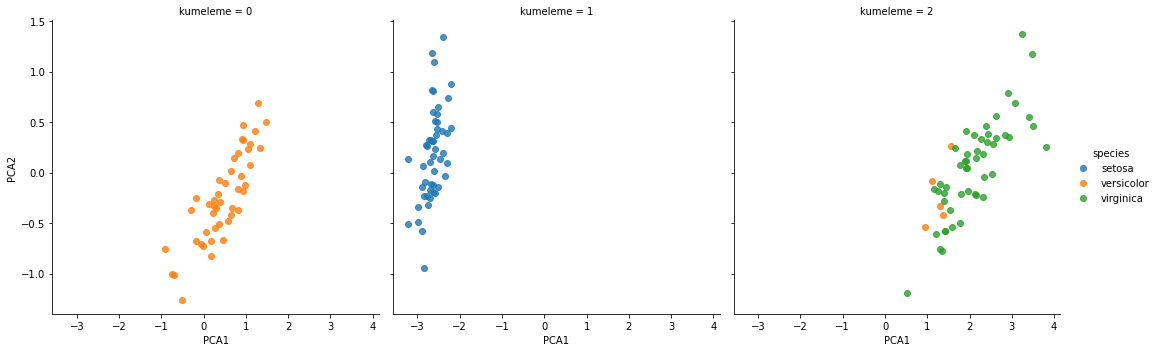

In [57]:
sns.lmplot("PCA1","PCA2", hue="species", data=iris, col = "kumeleme", fit_reg= False)

In [42]:
##################___Uygulama-2-___##################

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()

In [44]:
digits.images.shape

(1797, 8, 8)

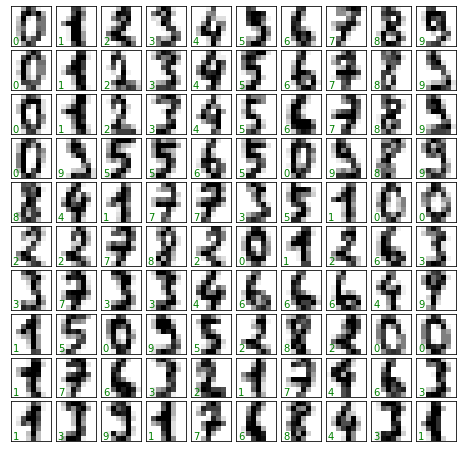

In [45]:
fig, axes = plt.subplots(10,10, figsize = (8,8), subplot_kw = {"xticks":[], "yticks":[]},
gridspec_kw= dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation = "nearest")
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = "green")

In [46]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [47]:
from sklearn.manifold import Isomap

In [48]:
iso = Isomap(n_components=2)
iso.fit(X)
data2 = iso.transform(X)
data2.shape

(1797, 2)

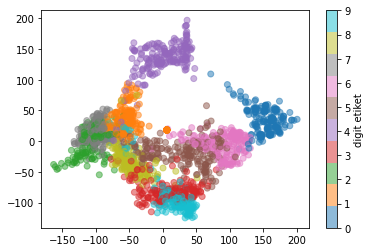

In [49]:
plt.scatter(data2[:,0], data2[:,1], c = digits.target, alpha = 0.5, cmap = plt.cm.get_cmap("tab10",10))
plt.colorbar(label = "digit etiket", ticks = range(10))

In [50]:
from sklearn.model_selection import train_test_split
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, random_state = 0)

In [51]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_egitim, y_egitim)

GaussianNB()

In [52]:
y_model = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8333333333333334

In [54]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)

Text(91.68, 0.5, 'Gerçek Değeri')

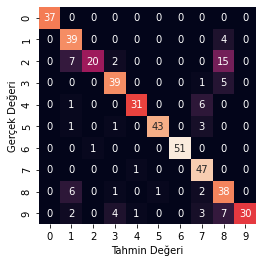

In [55]:
sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel("Tahmin Değeri")
plt.ylabel("Gerçek Değeri")